# 📊 02 – EDA Part 1: BASIC QUESTIONS – "What's Here?"

This notebook kicks off the Exploratory Data Analysis (EDA) for our airplane crash dataset. We begin by answering the most **basic, foundational questions** to get a sense of what's in the data.

Think of this as walking into a room and looking around — before we start spotting patterns, we must first understand what we have.

---

## 🎯 Goals of This Notebook

- Count total records and inspect dataset shape  
- Investigate missing data and overall data quality  
- Explore commonly occurring values (aircrafts, locations, operators)  
- Understand basic distributions (passengers aboard, fatalities, etc.)  
- Segment crashes by type (military vs. civilian)

---

### 📌 Questions 

1. How many total crashes are there?  
2. How many rows (crashes) are missing data?  
3. What are the most common aircraft types?  
4. What are the most common crash locations (top 10)?  
5. How many unique operators are there?  
6. How many crashes involve military vs. civilian operators?  
7. What's the distribution of total people aboard?  
8. What % of crashes involved fatalities?  
9. What % of crashes killed people on the ground?

---

📁 Input File: `cleaned_airplane_crashes.csv`  
🧠 Output: Initial descriptive statistics and visualizations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# : make plots look nice
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Load cleaned dataset
df = pd.read_csv("cleaned_airplane_crashes.csv")

❓ Q1: How many total crashes are there?

In [3]:
print(f"Total crashes in dataset: {df.shape[0]}")

Total crashes in dataset: 4972


This is the working dataset after cleaning. The original had `4998` crashes, but 26 rows were likely dropped during cleaning due to malformed or unusable records.


❓ Q2: How many rows (crashes) are missing data?

In [19]:
df_raw = pd.read_csv("../../Data/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding="latin1")

# Count how many rows have at least one missing value
missing_rows = df_raw.isnull().any(axis=1).sum()
total_rows = df_raw.shape[0]
print(f"Crashes with at least one missing data from the original file: {missing_rows} out of {total_rows} ({missing_rows / total_rows:.2%})")


Crashes with at least one missing data from the original file: 3753 out of 4998 (75.09%)


**Crashes with at least one missing field**: `3753 out of 4998`  
That's about **75.09%** of the dataset.

➡️ This shows that missing data is widespread. While cleaned the version is being used for other questions, this high percentage highlights **uncertainty** in older records and the difficulty of collecting crash data over more than a century.

❓ Q3: What are the most common aircraft types?

In [7]:
df["ac_type"].value_counts().head(10)

ac_type
Douglas DC-3                                332
de Havilland Canada DHC-6 Twin Otter 300     82
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 38
Yakovlev YAK-40                              35
Antonov AN-26                                35
Junkers JU-52/3m                             31
Douglas C-47B                                27
De Havilland DH-4                            27
Name: count, dtype: int64

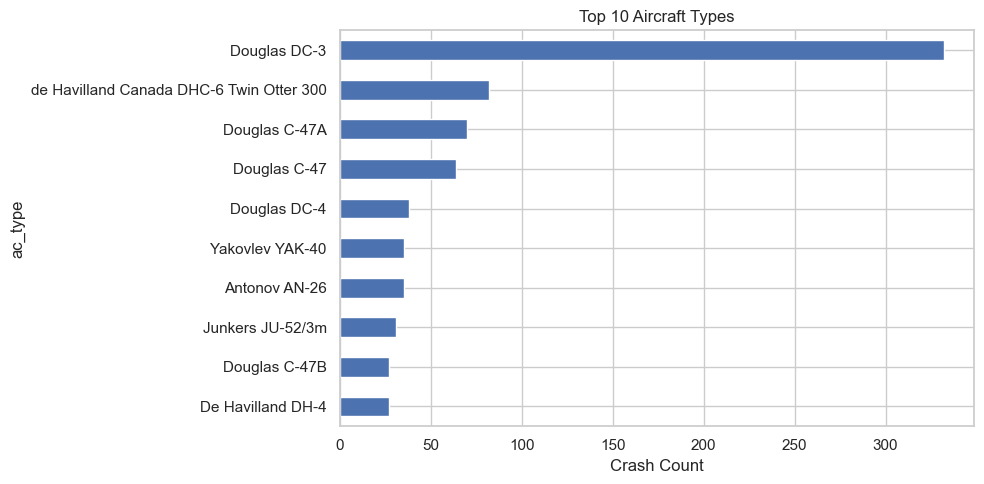

In [8]:
df["ac_type"].value_counts().head(10).plot(kind="barh", title="Top 10 Aircraft Types")
plt.xlabel("Crash Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The most frequently involved aircraft types:
- Douglas DC-3 → 332 crashes
- Twin Otter 300 → 82
- Douglas C-47A → 70  
These models are widely used in military/civil operations and have long service lives, explaining their presence.

❓ Q4: What are the most common crash locations (top 10)?

In [9]:
df["location"].value_counts().head(10)

location
Moscow, Russia            16
Manila, Philippines       15
Sao Paulo, Brazil         13
Cairo, Egypt              13
New York, New York        13
Bogota, Colombia          12
Rio de Janeiro, Brazil    12
Near Moscow, Russia       11
Chicago, Illinois         11
Tehran, Iran              10
Name: count, dtype: int64

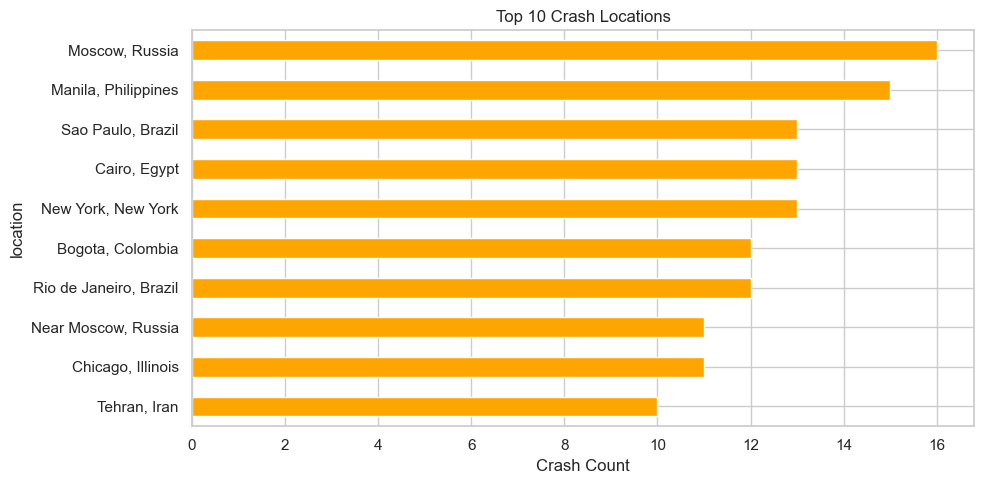

In [10]:
df["location"].value_counts().head(10).plot(kind="barh", color="orange", title="Top 10 Crash Locations")
plt.xlabel("Crash Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Cities/regions with the most recorded crashes:
- Moscow, Russia (16)
- Manila, Philippines (15)
- New York, USA (13)
- Cairo, Egypt (13)

These aren’t necessarily the most dangerous — they could reflect **more air traffic**, **better reporting**, or **historic conflict zones**.

❓ Q5: How many unique operators are there?

In [12]:
unique_ops = df["operator"].nunique()
print(f"Total unique operators: {unique_ops}")

Total unique operators: 2260


There are **2260 unique operators**, including:
- Commercial airlines
- National air forces
- Private aviation companies

The spread shows how **broad and varied** the aviation landscape is.

❓ Q6: How many crashes involve military vs. civilian operators?

In [13]:
df["is_military"] = df["operator"].str.contains("military|navy|air force|army", case=False, na=False)
df["is_military"].value_counts()

is_military
False    4196
True      776
Name: count, dtype: int64

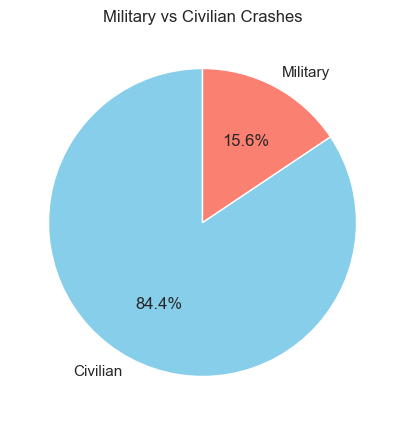

In [14]:
df["is_military"].value_counts().plot.pie(
    labels=["Civilian", "Military"],
    autopct="%1.1f%%",
    colors=["skyblue", "salmon"],
    startangle=90
)
plt.title("Military vs Civilian Crashes")
plt.ylabel("")
plt.show()

- **Civilian crashes**: 4196
- **Military crashes**: 776

Military flights make up about **15.6%** of crashes. These include war-time flights, test flights, and training missions.

❓ Q7: What’s the distribution of total people aboard?

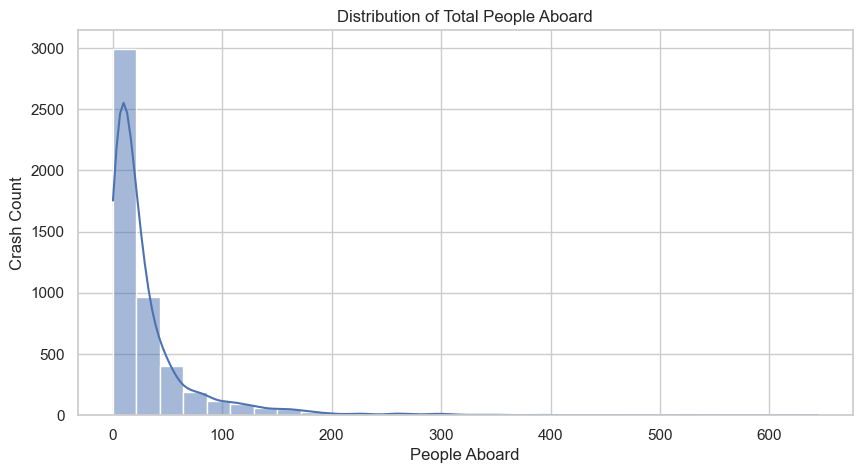

In [20]:
#How many people are usually on board the aircraft when crashes occur — and how does that number vary?
sns.histplot(df["aboard"], bins=30, kde=True)
plt.title("Distribution of Total People Aboard")
plt.xlabel("People Aboard")
plt.ylabel("Crash Count")
plt.show()

The histogram shows that **most crashes involve smaller aircraft** with under 20 people aboard.

- Heavy right skew (long tail): a few tragic incidents involved 300+ people.
- Suggests that crashes are **more frequent in small planes**, but **more deadly** when large commercial flights are involved.

❓ Q8: What % of crashes involved fatalities?

In [16]:
fatal_crashes = df["fatalities"] > 0
fatal_pct = fatal_crashes.mean() * 100
print(f"Percentage of crashes with fatalities: {fatal_pct:.2f}%")

Percentage of crashes with fatalities: 98.37%


**98.37%** of all crashes involved at least one fatality.  
Crashes with no deaths are **extremely rare**, which highlights the **high-risk nature of aviation accidents**.

❓ Q9: What % of crashes killed people on the ground?

In [17]:
ground_deaths = df["ground"] > 0
ground_pct = ground_deaths.mean() * 100
print(f"Percentage of crashes with ground fatalities: {ground_pct:.2f}%")

Percentage of crashes with ground fatalities: 4.85%


Only **4.85%** of crashes involved ground fatalities.  
That means over 95% of incidents resulted in casualties only among those onboard.

### ✅ Basic EDA Summary
- Cleaned dataset includes 4972 crash records.
- Majority of crashes involve small aircraft with few passengers.
- Military crashes account for ~15%.
- Fatalities are present in almost all crashes (98.37%).
- Only a small fraction of crashes involved harm to people on the ground.

Next: We'll look at **time trends** in airplane crashes — by year, decade, and key historic periods like WWI, WWII, and the jet age.